# Air quality testing

This notebook tests the functionality for the [rsinaica](https://github.com/diegovalle/rsinaica) and [googletraffic](https://github.com/dime-worldbank/googletraffic) for air quality research.

## Import libraries

In [1]:
library("rsinaica")
library("googletraffic")

## RSinaica

In [2]:
knitr::kable(stations_sinaica[which(stations_sinaica$station_name == "Centro"), 1:6])



|    | station_id|station_name |station_code | network_id|network_name                    |network_code |
|:---|----------:|:------------|:------------|----------:|:-------------------------------|:------------|
|12  |         33|Centro       |CEN          |         30|Aguascalientes                  |AGS          |
|47  |         54|Centro       |CEN          |         38|Chihuahua                       |CHIH1        |
|84  |        102|Centro       |CEN          |         63|Guadalajara                     |GDL          |
|358 |        170|Centro       |CEN          |         78|Zona Metropolitana de Querétaro |ZMQ          |

View available stations

In [3]:
knitr::kable(stations_sinaica[1:6])



| station_id|station_name                                                                              |station_code | network_id|network_name                    |network_code |
|----------:|:-----------------------------------------------------------------------------------------|:------------|----------:|:-------------------------------|:------------|
|        397|CENICA 1, UAM Iztapalapa                                                                  |CEN          |        144|NA                              |ESTSP        |
|        344|C. Salud Tlaxcoapán                                                                       |TCP          |        127|NA                              |TCP          |
|        365|Costa Baja                                                                                |UM           |        140|NA                              |LAP          |
|        393|Unidad Móvil de Hidalgo                                                                   |UMHI

Filter for Guadalajara

In [4]:
knitr::kable(stations_sinaica[which(stations_sinaica$network_name == "Guadalajara"), 1:6])



|   | station_id|station_name |station_code | network_id|network_name |network_code |
|:--|----------:|:------------|:------------|----------:|:------------|:------------|
|82 |        103|Las Águilas  |AGU          |         63|Guadalajara  |GDL          |
|83 |        101|Atemajac     |ATM          |         63|Guadalajara  |GDL          |
|84 |        102|Centro       |CEN          |         63|Guadalajara  |GDL          |
|85 |        105|Loma Dorada  |LDO          |         63|Guadalajara  |GDL          |
|86 |        106|Miravalle    |MIR          |         63|Guadalajara  |GDL          |
|87 |        107|Oblatos      |OBL          |         63|Guadalajara  |GDL          |
|88 |        104|Las Pintas   |PIN          |         63|Guadalajara  |GDL          |
|89 |        108|Santa Fe     |SFE          |         63|Guadalajara  |GDL          |
|90 |        109|Tlaquepaque  |TLA          |         63|Guadalajara  |GDL          |
|91 |        110|Vallarta     |VAL          |       

Filter data according to network name and check for available dates

In [5]:
for (value in stations_sinaica[stations_sinaica$network_name == 'Guadalajara', ]$station_id) {

    if (is.na(value)) {
    next  # Skip NA values
  }
  # print(sinaica_station_dates(value))
    station_name = stations_sinaica[stations_sinaica$station_id == value, ]$station_name
    print(paste(station_name, sinaica_station_dates(value)))
}

[1] "Las Águilas 1997-01-01" "Las Águilas 2024-10-04"
[1] "Atemajac 1997-01-01" "Atemajac 2024-11-23"
[1] "Centro 1997-01-01" "Centro 2025-01-30"
[1] "Loma Dorada 1997-01-01" "Loma Dorada 2025-01-29"
[1] "Miravalle 1997-01-01" "Miravalle 2025-01-30"
[1] "Oblatos 1997-01-01" "Oblatos 2025-01-30"
[1] "Las Pintas 2010-12-31" "Las Pintas 2024-09-07"
[1] "Santa Fe 2012-12-31" "Santa Fe 2025-01-06"
[1] "Tlaquepaque 1997-01-01" "Tlaquepaque 2025-01-29"
[1] "Vallarta 1997-01-01" "Vallarta 2025-01-30"


### Plot Guadalajara stations

In [6]:
library(sf)
library(ggplot2)

Linking to GEOS 3.12.2, GDAL 3.9.3, PROJ 9.4.1; sf_use_s2() is TRUE



In [7]:
# filter data for Guadalajara
stations_gdl = stations_sinaica[stations_sinaica$network_name == 'Guadalajara', ]
# remove rows with NA values in lat and lon
stations_gdl = stations_gdl[complete.cases(stations_gdl$lat, stations_gdl$lon), ]
sf_df <- st_as_sf(stations_gdl, coords = c("lon", "lat"), crs = 4326)

In [8]:
head(sf_df,2)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

station_id station_name station_code network_id network_name network_code
82 103        Las Águilas  AGU          63         Guadalajara  GDL         
83 101        Atemajac     ATM          63         Guadalajara  GDL         
   street                                  ext   interior colonia    
82 Avenida López Mateos                    5250           Las águilas
83 Hidalgo, Unidad Administrativa Atemajac Plaza          Atemajac   
   geometry                   ⋯
82 POINT (-103.4164 20.63127) ⋯
83 POINT (-103.3554 20.71967) ⋯
   address                                                                          
82 Avenida Adolfo López Mateos No. 5250 , Arboledas. Zapopan, 45070, Jalisco        
83 Hidalgo No. 1 entre Cuauhtémoc y Ramón Corona , Atemajac. Zapopan, 45190, Jalisco
   date_validated date_validated2 passed_validation video date_started
82 NA             2014-12-31      0                       1997-01-01  
83 NA             2014-12-31      0                       1997-01-01  
   timezone                                   street_view video_interior
82 Tiempo del centro, UTC-6 (UTC-5 en verano)                           
83 Tiempo del centro, UTC-6 (UTC-5 en verano)                           
   geometry                  
82 POINT (-103.4164 20.63127)
83 POINT (-103.3554 20.71967)

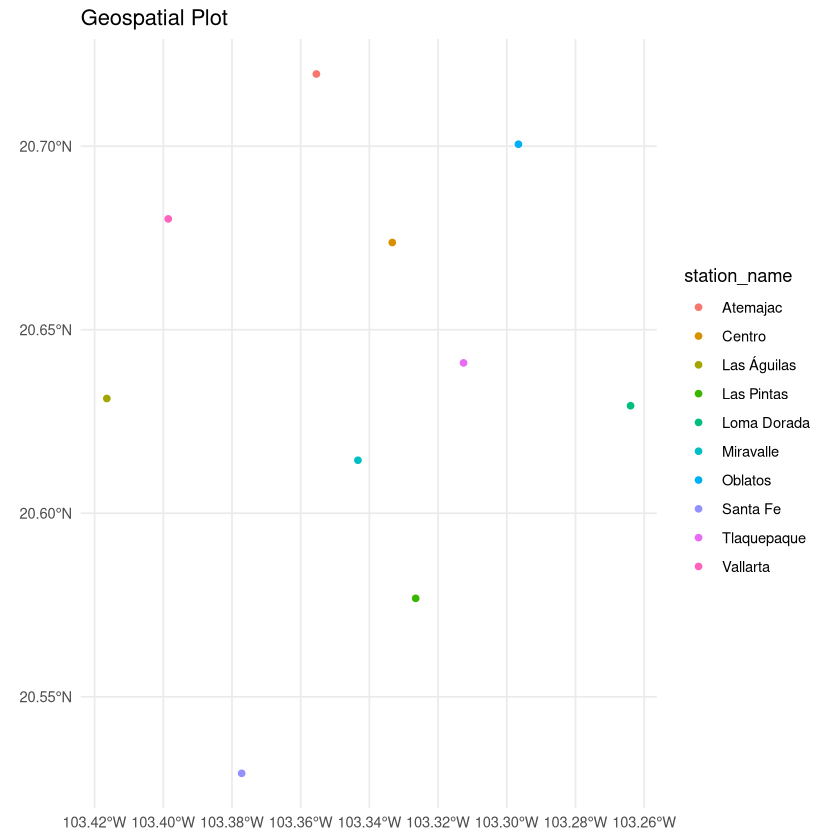

In [9]:
ggplot(data = sf_df) +
  geom_sf(aes(color = station_name)) +
  theme_minimal() +
  labs(title = "Geospatial Plot", color = "station_name")

### Download pollutant data for a specific date

In [10]:
df <-  sinaica_station_data(103, # station_id
                         "PM10", # can be one of parameters$parameter_code
                         "2024-01-15", 
                         "2024-01-15", # Maximum of one month
                         "Crude" # Crude, Manual or Validated
                         )
df

id,date,hour,value,valid,unit,station_id,station_name
<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<int>,<chr>
103PM1024011500,2024-01-15,0,15.311,1,µg/m³,103,Las Águilas
103PM1024011501,2024-01-15,1,15.308,1,µg/m³,103,Las Águilas
103PM1024011502,2024-01-15,2,15.308,1,µg/m³,103,Las Águilas
103PM1024011503,2024-01-15,3,15.319,1,µg/m³,103,Las Águilas
103PM1024011504,2024-01-15,4,15.315,1,µg/m³,103,Las Águilas
103PM1024011505,2024-01-15,5,15.312,1,µg/m³,103,Las Águilas
103PM1024011506,2024-01-15,6,15.313,1,µg/m³,103,Las Águilas
103PM1024011507,2024-01-15,7,15.325,1,µg/m³,103,Las Águilas
103PM1024011508,2024-01-15,8,15.299,1,µg/m³,103,Las Águilas


## Google traffic

In [11]:
library(dplyr)
library(raster)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select




In [23]:
google_key <- ####

In [24]:
## Make raster
 r <- gt_make_raster(location   = c(40.712778, -74.006111),
                     height     = 2000,
                     width      = 2000,
                     zoom       = 16,
                     google_key = google_key)
r

Pausing for 16 seconds to allow traffic data to render

Warning message in dir.create(filename_dir):
“'/tmp/Rtmp18KAaz' already exists”
file:////tmp/Rtmp18KAaz/filecb9e8c71476.html screenshot completed



class      : RasterLayer 
dimensions : 2010, 2006, 4032060  (nrow, ncol, ncell)
resolution : 2.15e-05, 1.63e-05  (x, y)
extent     : -74.02768, -73.98455, 40.69639, 40.72915  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : memory
names      : filecb9e8c71476_1 
values     : NA, NA  (min, max)


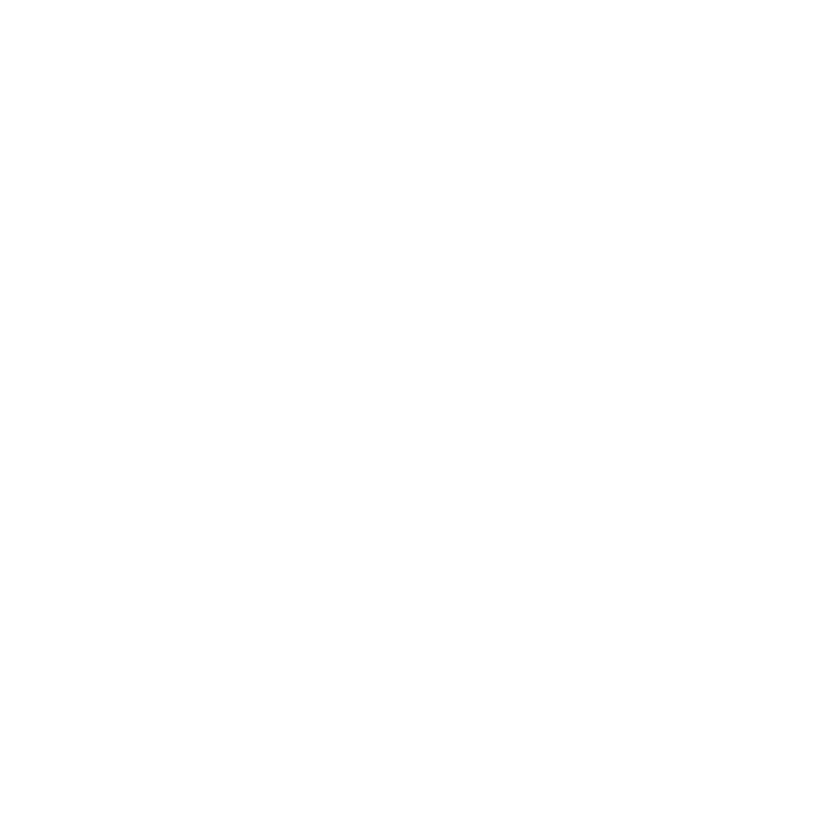

In [25]:

## Plot
r_df <- rasterToPoints(r, spatial = TRUE) %>% as.data.frame()
names(r_df) <- c("value", "x", "y")

ggplot() +
  geom_raster(data = r_df, 
  aes(x = x, y = y, 
  fill = as.factor(value))) +
  labs(fill = "Traffic\nLevel") +
  scale_fill_manual(values = c("green2", "orange", "red", "#660000")) +
  coord_quickmap() + 
  theme_void() +
  theme(plot.background = element_rect(fill = "white", color="white"))